In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 提出问题

### 红酒品质和哪些因素有关系

In [6]:
df = pd.read_csv('./winequality-red.csv')
# 数据集来源 kiggle上 Prediction of quality of Wine

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### 理解数据

In [8]:
df.info()
'''
fixed acidity 固定酸度
volatile acidity 挥发性酸度
citric acid 柠檬酸 
residual sugar 残留糖
chlorides 氯化物
free sulfur dioxide 游离二氧化硫
total sulfur dioxide 总二氧化硫
density 密度
pH  pH
sulphates 硫酸盐
alcohol 硫酸盐
12 - quality (score between 0 and 10) 质量（得分在0到10之间）
    
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
# 没有缺失值，不用进行数据处理

#### 分析单个特性和质量的关系

In [40]:
columns_list = list(df.columns)
columns_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']


Figure 1: Univariate Boxplots


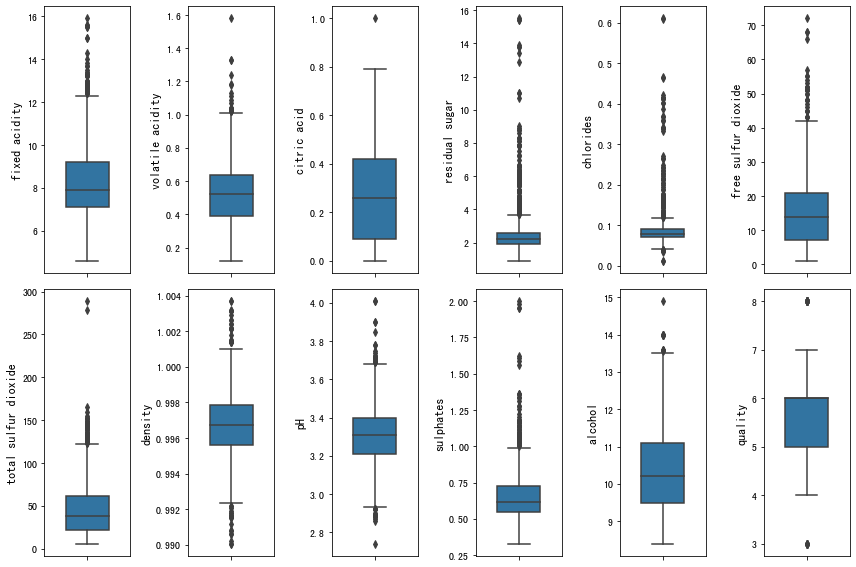

In [89]:
# 各项特征数据箱线图
fig = plt.figure(figsize=(12,8))
for i in range(1,13):
    plt.subplot(2,6,i)
    sns.boxplot(df[columns[i-1]],orient='v',width=0.5)
    plt.ylabel(columns[i-1],fontsize=12)

plt.tight_layout()
print('\nFigure 1: Univariate Boxplots')



Figure 2: Univariate Histograms


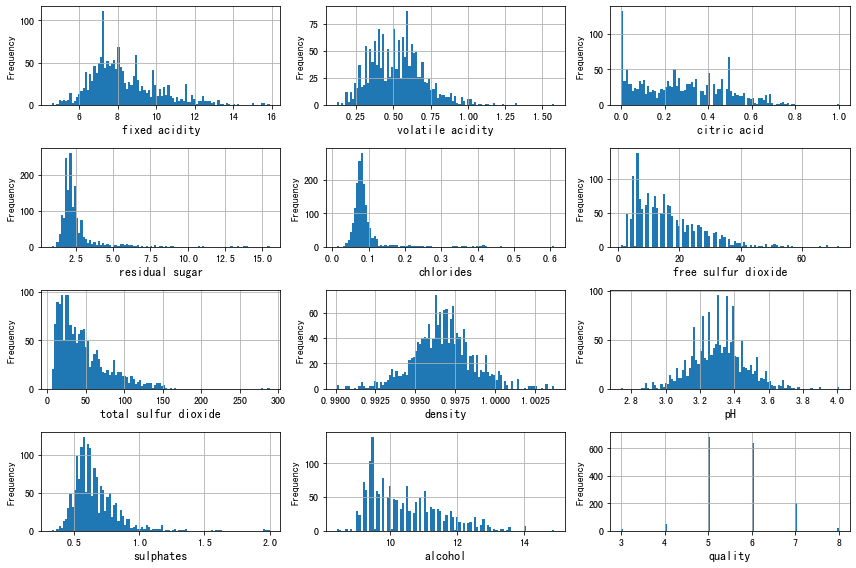

In [91]:
# 各项特征数据直方图
fig = plt.figure(figsize=(12,8))
for i in range(1,13):
    plt.subplot(4,3,i)
    df[columns[i-1]].hist(bins=100)
    plt.xlabel(columns[i-1],fontsize=12)
    plt.ylabel('Frequency')
plt.tight_layout()
print('\nFigure 2: Univariate Histograms')

### 品质
* 品质大多数集中在5，6分

### 酸度相关特征
* fixed acidity, volatile acidity, citric acid, free sulfur dioxide, total sulfur dioxide, sulphates, pH

In [92]:
acid_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'pH']


Figure 3: Acidity Features in log10 Scale


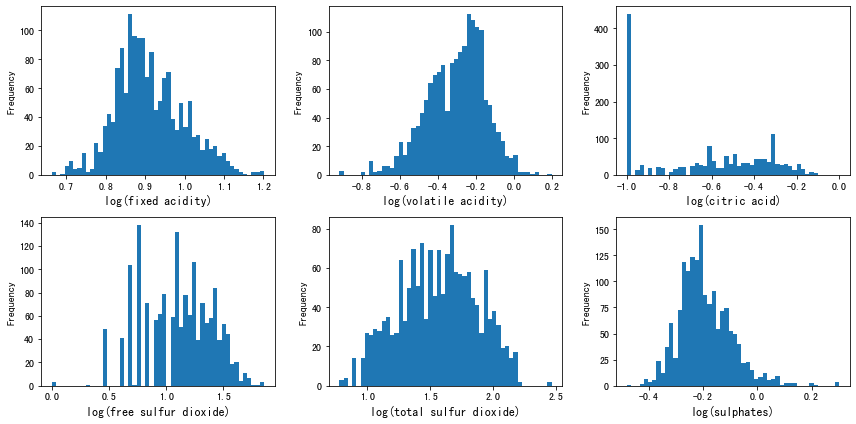

In [95]:
plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    v = np.log10(np.clip(df[acid_list[i]].values,a_min=0.1,a_max=None))
    plt.hist(v,bins=50)
    plt.xlabel('log('+acid_list[i]+')',fontsize=12)
    plt.ylabel('Frequency')
plt.tight_layout()
print('\nFigure 3: Acidity Features in log10 Scale')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


Figure 4


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


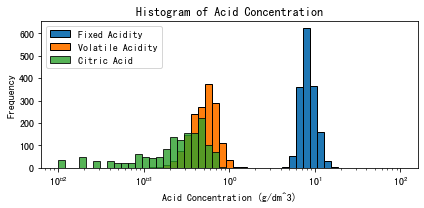

In [96]:
plt.figure(figsize=(6,3))

bins = 10**(np.linspace(-2, 2))
plt.hist(df['fixed acidity'], bins = bins, edgecolor = 'k', label = 'Fixed Acidity')
plt.hist(df['volatile acidity'], bins = bins, edgecolor = 'k', label = 'Volatile Acidity')
plt.hist(df['citric acid'], bins = bins, edgecolor = 'k', alpha = 0.8, label = 'Citric Acid')
plt.xscale('log')
plt.xlabel('Acid Concentration (g/dm^3)')
plt.ylabel('Frequency')
plt.title('Histogram of Acid Concentration')
plt.legend()
plt.tight_layout()

print('Figure 4')

In [98]:
# 总酸度
df['total acid'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']


Figure 5: Total Acid Histogram


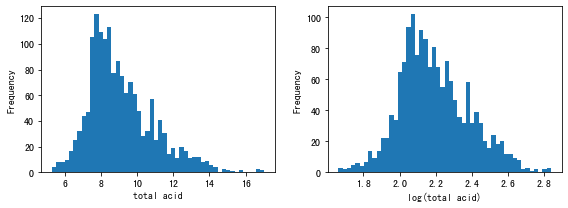

In [99]:
plt.figure(figsize = (8,3))

plt.subplot(121)
plt.hist(df['total acid'], bins = 50)
plt.xlabel('total acid')
plt.ylabel('Frequency')
plt.subplot(122)
plt.hist(np.log(df['total acid']), bins = 50)
plt.xlabel('log(total acid)')
plt.ylabel('Frequency')
plt.tight_layout()

print("Figure 5: Total Acid Histogram")

#### 甜度(sweetness)
Residual sugar 与酒的甜度相关，通常用来区别各种红酒，干红（<=4 g/L), 半干（4-12 g/L）,半甜（12-45 g/L），和甜（>45 g/L)。 这个数据中，主要为干红，没有甜葡萄酒。


In [100]:
df['sweetness'] = pd.cut(df['residual sugar'], bins = [0, 4, 12, 45], 
                         labels=["dry", "medium dry", "semi-sweet"])


Figure 6: Sweetness


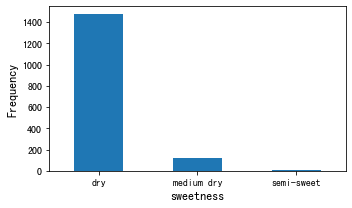

In [101]:
plt.figure(figsize = (5,3))
df['sweetness'].value_counts().plot(kind = 'bar')
plt.xticks(rotation=0)
plt.xlabel('sweetness', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.tight_layout()
print("Figure 6: Sweetness")

## 双变量分析

#### 红酒品质和理化特征的关系

下面Figure 7和8分别显示了红酒理化特征和品质的关系。其中可以看出的趋势有：   

* 品质好的酒有更高的柠檬酸，硫酸盐，和酒精度数。硫酸盐(硫酸钙)的加入通常是调整酒的酸度的。其中酒精度数和品质的相关性最高。
* 品质好的酒有较低的挥发性酸类，密度，和pH。
* 残留糖分，氯离子，二氧化硫似乎对酒的品质影响不大。

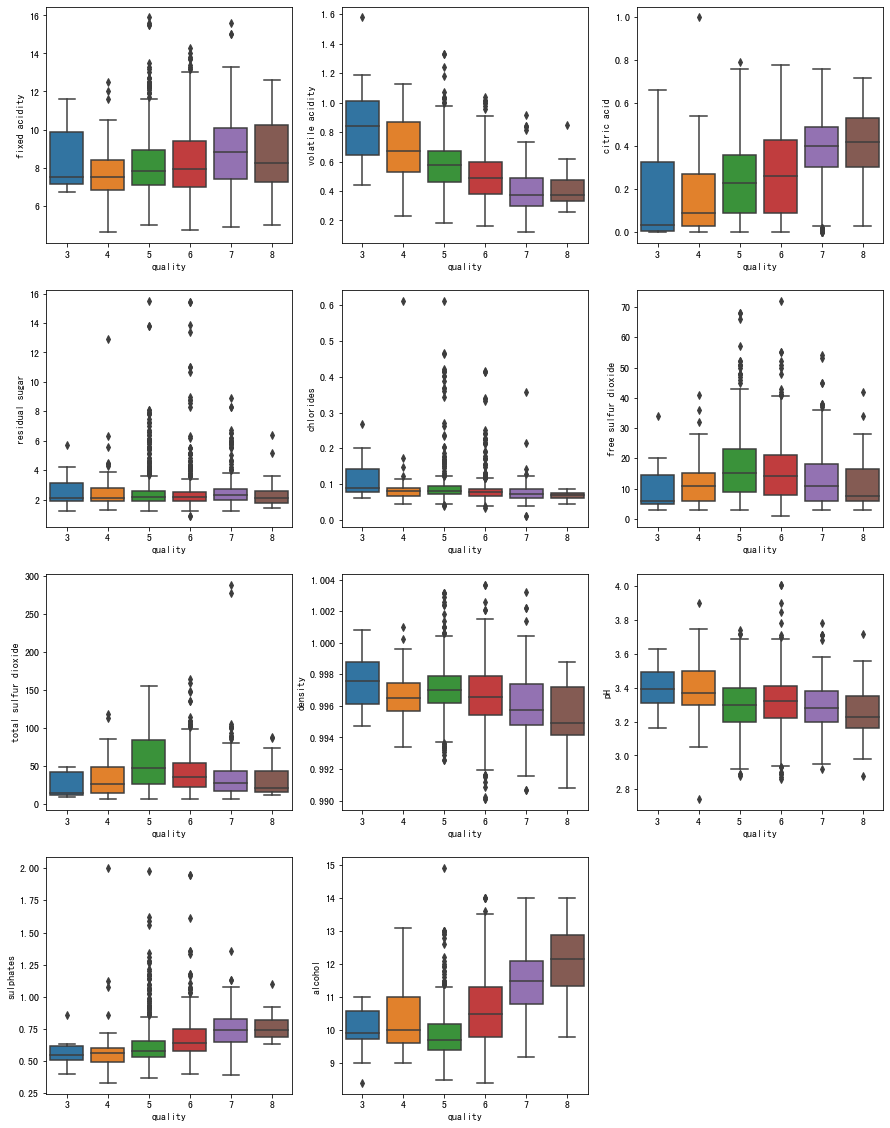

In [42]:
# 绘制每个特征的箱线图
fig = plt.figure(figsize=(15,20))
for i in range(1,12):
    plt.subplot(4,3,i)
    sns.boxplot(x='quality',y=columns_list[i-1],data=df)
plt.show()

In [69]:
corr_matrix = df.corr()
corr_matrix['quality'].sort_values()
corr_matrix = corr_matrix.round(2).astype(float)

In [81]:
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25



Figure 8: Pairwise Correlation Plot


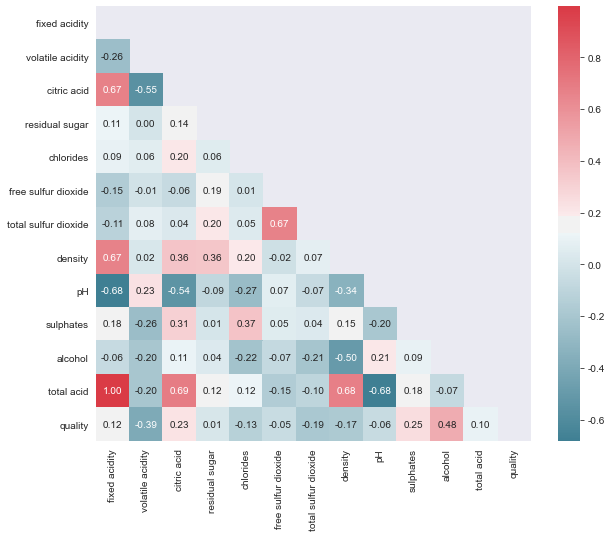

In [103]:
sns.set_style("dark")

plt.figure(figsize = (10,8))
colnm = df.columns.tolist()[:11] + ['total acid', 'quality']
mcorr = df[colnm].corr()
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
print("\nFigure 8: Pairwise Correlation Plot")


#### 酸性物质含量和pH
pH和非挥发性酸性物质有-0.683的相关性。

Figure 10: pH vs acid


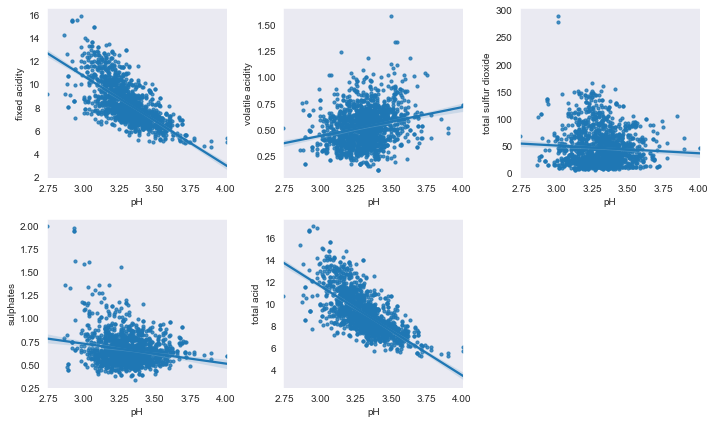

In [105]:

acidity_related = ['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 
                   'sulphates', 'total acid']

plt.figure(figsize = (10,6))

for i in range(5):
    plt.subplot(2,3,i+1)
    sns.regplot(x='pH', y = acidity_related[i], data = df, scatter_kws = {'s':10})
plt.tight_layout()
print("Figure 10: pH vs acid")

D:\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


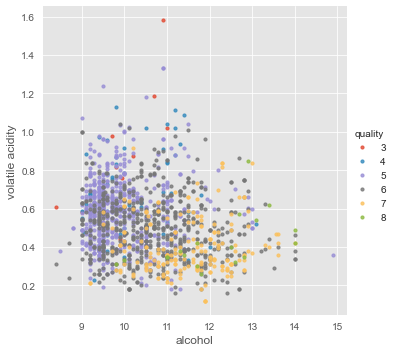

In [106]:
plt.style.use('ggplot')

sns.lmplot(x = 'alcohol', y = 'volatile acidity', hue = 'quality', 
           data = df, fit_reg = False, scatter_kws={'s':10}, size = 5)

## 总结：

整体而言，红酒的品质主要与酒精浓度，挥发性酸，和柠檬酸有关。对于品质优于7，或者劣于4的酒，直观上是线性可分的。但是品质为5，6的酒很难线性区分。
